# Figure 2c - Proportions of AS events that were strictly tissue specific, present in 2-5, or over 5 tissues

## **NOTE**:

We assume that you have cloned the analysis repository and have `cd` into the parent directory. Before starting with the analysis make sure you have first completed the dependencies set up by following the instructions described in the **`dependencies/README.md`** document. All paths defined in this Notebook are relative to the parent directory (repository). Please close this Notebook and start again by following the above guidelines if you have not completed the aforementioned steps.

## Loading dependencies

In [1]:
library(ggplot2)
Sys.setenv(TAR = "/bin/tar") # for gzfile

Read in the file `genesWithCommonAs.tsv` containing number of splicing events per gene and number of tissues.

In [2]:

dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/genesWithCommonAS.tsv", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
head(dat)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,KDM6A,41,22
2,DDX3X,35,10
3,ZFX,33,19
4,XIST,32,29
5,KDM5C,23,19
6,SORBS2,22,4


## Getting Proportions
Making a table of the number of tissues per gene will get us the 
numbers we need for the proportions of alternative splicing events (AS) 
that are strictly tissue specific

In [3]:
tissue_specificity_cnt <- table(dat$Tissues)
tissue_specificity_cnt


   1    2    3    4    6    8    9   10   14   19   22   29 
3273  411   40    8    1    1    1    1    1    2    1    1 

### Make an Array of the table
Make an array of the table to access the values based upon the index

In [4]:
a <- unclass(tissue_specificity_cnt)
a

1    2    3    4    6    8    9   10   14   19   22   29 
3273  411   40    8    1    1    1    1    1    2    1    1

####  Names for logic

Using the names of this array contain the numbers of genes
with those number of splicing events, which we then can use for logical reasoning, such as number of genes that have tissue specific splicing events.  The length of this vector is equal to the length of the array.
Using this logical value within the array will allow us to sum the events for our figure.

In [5]:
tissue_cnts <- as.numeric(unclass(names(a)))
tissue_cnts == 1
a[tissue_cnts == 1]
low_cnt <- sum(as.numeric(a[tissue_cnts == 1]))
low_cnt

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

1 
3273

[1] 3273

In [6]:
a[tissue_cnts > 1 & tissue_cnts < 6]
medium_cnt <- sum(as.numeric(a[tissue_cnts > 1 & tissue_cnts < 6]))
medium_cnt

2   3   4 
411  40   8

[1] 459

In [7]:
a[tissue_cnts > 4]
high_cnt <- sum(as.numeric(a[tissue_cnts > 4]))
high_cnt

6  8  9 10 14 19 22 29 
 1  1  1  1  1  2  1  1

[1] 9

In [8]:
## set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.8)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)


In [9]:
## Make the pie chart figure 2c

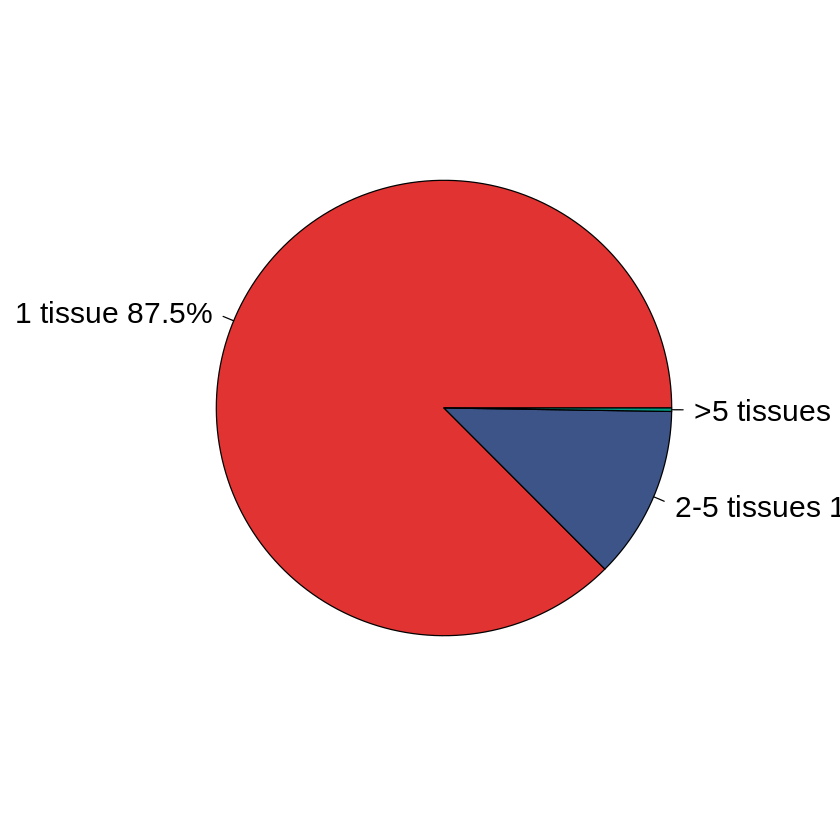

In [10]:
colrs <- c(npgRed,npgBlue,npgGreen)
slices <-c(low_cnt, medium_cnt, high_cnt)
lbls <-c("1 tissue","2-5 tissues",">5 tissues")
pct <- round(slices/sum(slices)*100, digits=1)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=colrs,main="",cex=1.5,xaxs="r",yaxs="r")

In [11]:
pdf ("../pdf/figure2c.pdf")
pie(slices,labels = lbls, col=colrs,main="",cex=1.5,xaxs="r",yaxs="r")
dev.off()

png 
  2

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [12]:
figure_2c   = "Figure_2c"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_2c, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_2c, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

Generating sha256 checksums of the artefacts in the `..data/` directory .. 


character(0)

Done!



sha256sum,file
<chr>,<chr>
5146c849c9354129590c59da5e6040a074523b4827d0975e3f5fa43737af7e9a,README.md


### 2. Libraries metadata

In [13]:
figure_2c   = "Figure_2c"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_2c, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_2c ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..
Done!

Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..
Done!



 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-02-27                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
